# Data Cleaning

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv')
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv')
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

imdb_joined = pd.merge(imdb_title_basics, imdb_title_ratings, on='tconst', how='left')
imdb_joined['title'] = imdb_joined['primary_title']
imdb_joined['year'] = imdb_joined['start_year']
tn_movie_budgets['title'] = tn_movie_budgets['movie']
tn_movie_budgets['year'] = tn_movie_budgets['release_date'].map(lambda x:x[-4:]).astype(int)

df = pd.merge(tn_movie_budgets, imdb_joined, on =["title", "year"], how ='left')

df['production_budget'] = df['production_budget'].map(lambda x:float(x.replace("$", "").replace(",", "")))
df['domestic_gross'] = df['domestic_gross'].map(lambda x:float(x.replace("$", "").replace(",", "")))
df['worldwide_gross'] = df['worldwide_gross'].map(lambda x:float(x.replace("$", "").replace(",", "")))

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year_month'] = df['release_date'].dt.to_period("M")

df = df.drop_duplicates(['title'])
df.drop(['id', 'movie', 'tconst', 'primary_title', 'original_title', 'start_year'], axis = 1, inplace = True)

df = df[~df['runtime_minutes'].isna()]
df = df[~df['genres'].isna()]
df = df[~df['averagerating'].isna()]
df = df[~df['numvotes'].isna()]

df.drop(df.index[df['domestic_gross'] == 0], inplace = True)
df.drop(df.index[df['worldwide_gross'] == 0], inplace = True)

df['domestic_profit'] = df['domestic_gross'] - df['production_budget']
df['worldwide_profit'] = df['worldwide_gross'] - df['production_budget']

df = df[['title', 'genres', 'runtime_minutes',\
        'year', 'release_year_month', 'release_date', 'averagerating',\
        'numvotes', 'production_budget', 'domestic_gross', 'domestic_profit',\
         'worldwide_gross', 'worldwide_profit']]

# Data Analysis

# Release month

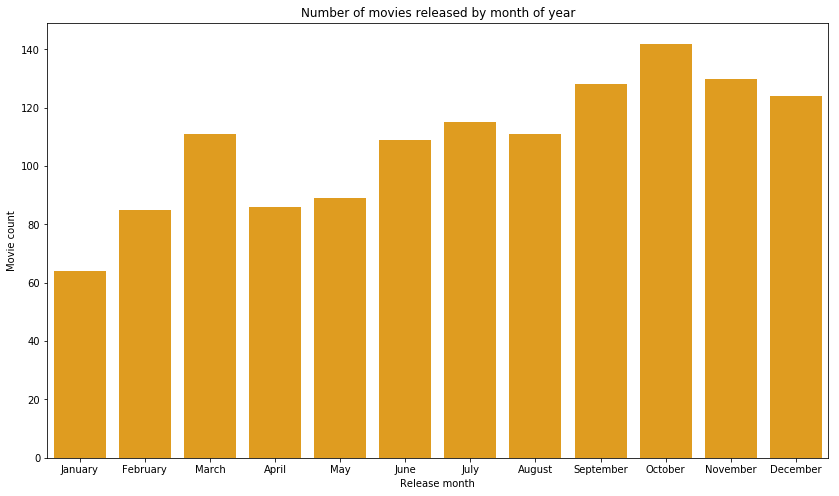

<Figure size 432x288 with 0 Axes>

In [3]:
# Movie counts by release month of a year
df['release_month'] = df['release_date'].dt.month
df['release_month_str']=df.release_date.dt.strftime("%B")

fig31 = plt.figure(figsize=(14, 8))
plt.plot()

movie_by_month = df.groupby(['release_month','release_month_str']).title.count().reset_index()
sns.barplot('release_month_str','title', data= movie_by_month, color = 'orange')

plt.title('Number of movies released by month of year')
plt.xlabel('Release month')
plt.ylabel('Movie count')
plt.show()

fig31.savefig("movie count by release month.png")
plt.clf()

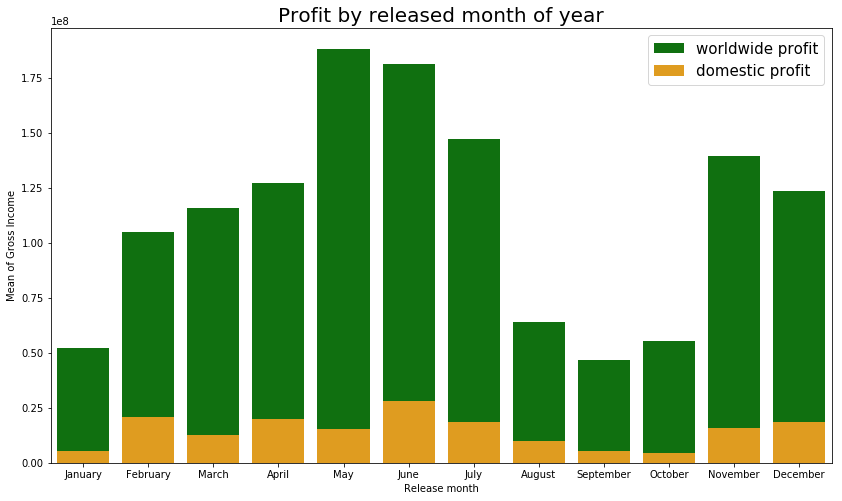

<Figure size 432x288 with 0 Axes>

In [11]:
# Profit by release month of a year
fig32 = plt.figure(figsize=(14, 8))
plt.plot()

worldwide_profit_by_month = df.groupby(['release_month','release_month_str']).worldwide_profit.mean().reset_index()
sns.barplot('release_month_str','worldwide_profit', data= worldwide_profit_by_month, color = 'green', label="worldwide profit")
domestic_profit_by_month = df.groupby(['release_month','release_month_str']).domestic_profit.mean().reset_index()
sns.barplot('release_month_str','domestic_profit', data= domestic_profit_by_month, color = 'orange', label="domestic profit")

plt.title('Profit by released month of year', fontsize=20)
plt.xlabel('Release month')
plt.ylabel('Mean of Gross Income')
plt.legend(fontsize=15)
plt.show()

fig32.savefig("movie profit by release month.png")
plt.clf()

## Production budget vs Domestic Profit and Worldwide Profit

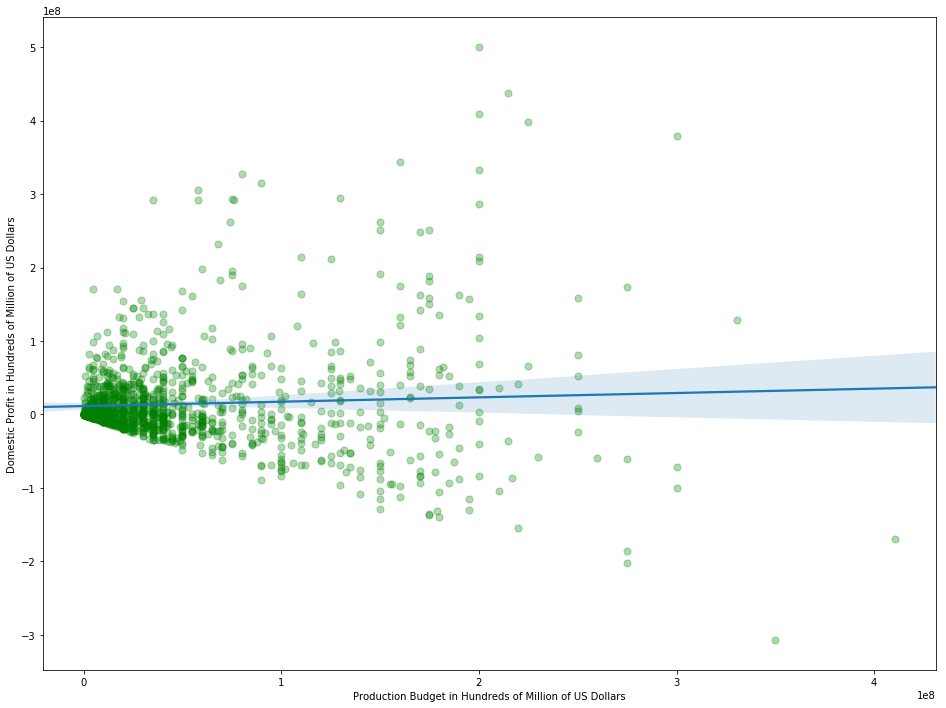

<Figure size 432x288 with 0 Axes>

In [4]:
fig1 = plt.figure(figsize=(16, 12))
plt.plot()

sns.regplot(x = df["production_budget"],\
            y = df["domestic_profit"], fit_reg = True, marker = ".",\
            scatter_kws={"color":"g","alpha":0.3,"s":200})

plt.xlabel('Production Budget in Hundreds of Million of US Dollars')
plt.ylabel('Domestic Profit in Hundreds of Million of US Dollars')
plt.show()

fig1.savefig("budget to domestic profit.png")
plt.clf()

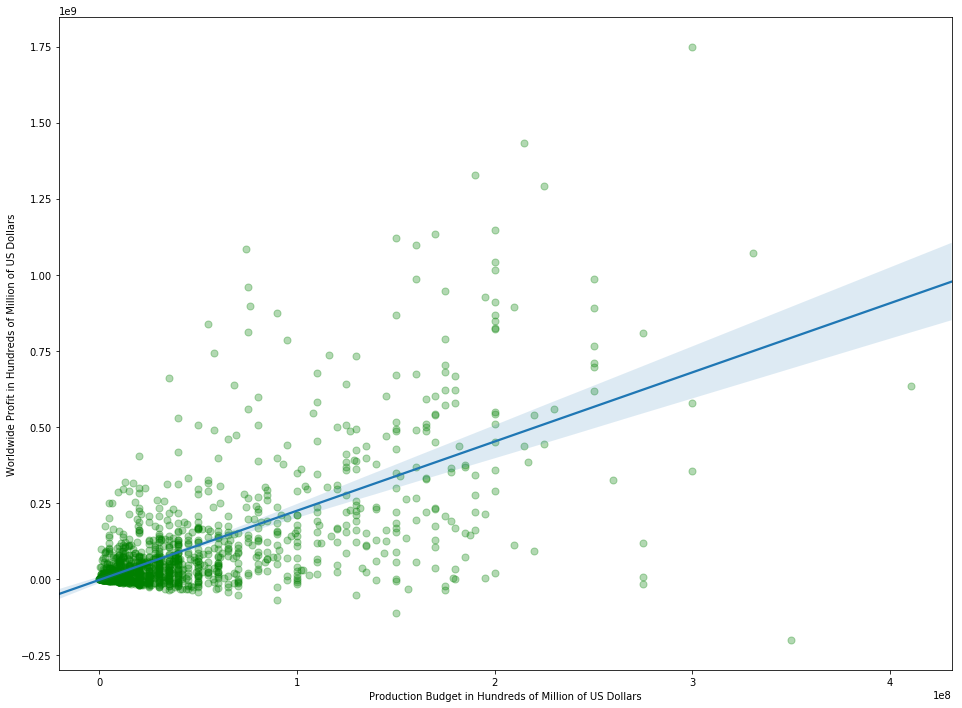

<Figure size 432x288 with 0 Axes>

In [5]:
fig2 = plt.figure(figsize=(16, 12))
plt.plot()

sns.regplot(x = df["production_budget"],\
            y = df["worldwide_profit"], fit_reg = True, marker = ".",\
            scatter_kws={"color":"g","alpha":0.3,"s":200})

plt.xlabel('Production Budget in Hundreds of Million of US Dollars')
plt.ylabel('Worldwide Profit in Hundreds of Million of US Dollars')
plt.show()

fig2.savefig("budget to worldwide profit.png")
plt.clf()

In [6]:
df.corr()

,runtime_minutes,year,averagerating,numvotes,production_budget,domestic_gross,domestic_profit,worldwide_gross,worldwide_profit,release_month
runtime_minutes,1.000000,0.117335,0.410212,0.418984,0.354021,0.299726,0.092502,0.314882,0.278436,0.132340
year,0.117335,1.000000,0.035326,-0.111422,0.062568,0.091843,0.070578,0.100872,0.103778,-0.062055
averagerating,0.410212,0.035326,1.000000,0.512510,0.186603,0.308551,0.258819,0.292825,0.299835,0.204834
numvotes,0.418984,-0.111422,0.512510,1.000000,0.525044,0.651234,0.425583,0.640040,0.621756,0.046609
production_budget,0.354021,0.062568,0.186603,0.525044,1.000000,0.698402,0.054483,0.777833,0.651814,-0.059677
domestic_gross,0.299726,0.091843,0.308551,0.651234,0.698402,1.000000,0.752694,0.942663,0.937214,-0.052928
domestic_profit,0.092502,0.070578,0.258819,0.425583,0.054483,0.752694,1.000000,0.599633,0.707954,-0.018945
worldwide_gross,0.314882,0.100872,0.292825,0.640040,0.777833,0.942663,0.599633,1.000000,0.983621,-0.038068
worldwide_profit,0.278436,0.103778,0.299835,0.621756,0.651814,0.937214,0.707954,0.983621,1.000000,-0.028822
release_month,0.132340,-0.062055,0.204834,0.046609,-0.059677,-0.052928,-0.018945,-0.038068,-0.028822,1.000000


## Movie duration

In [7]:
movie_duration = df.sort_values('runtime_minutes')

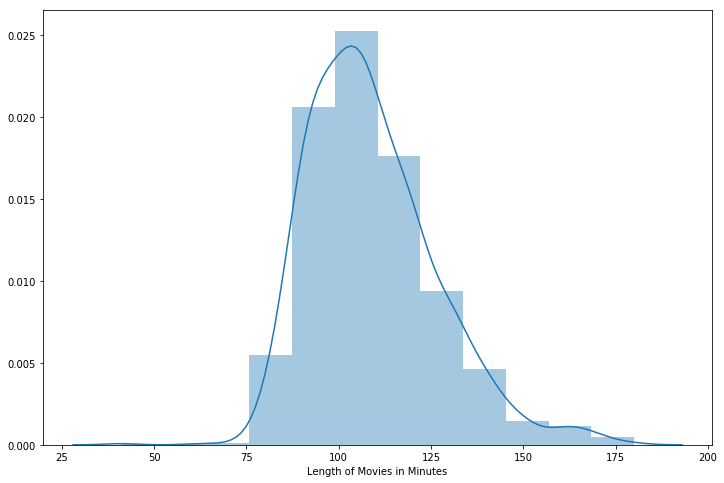

<Figure size 432x288 with 0 Axes>

In [8]:
fig4 = plt.figure(figsize=(12, 8))
plt.plot()

sns.distplot( df['runtime_minutes'], bins=12)

plt.xlabel('Length of Movies in Minutes')
plt.show()

fig4.savefig("movie duration histogram.png")
plt.clf()

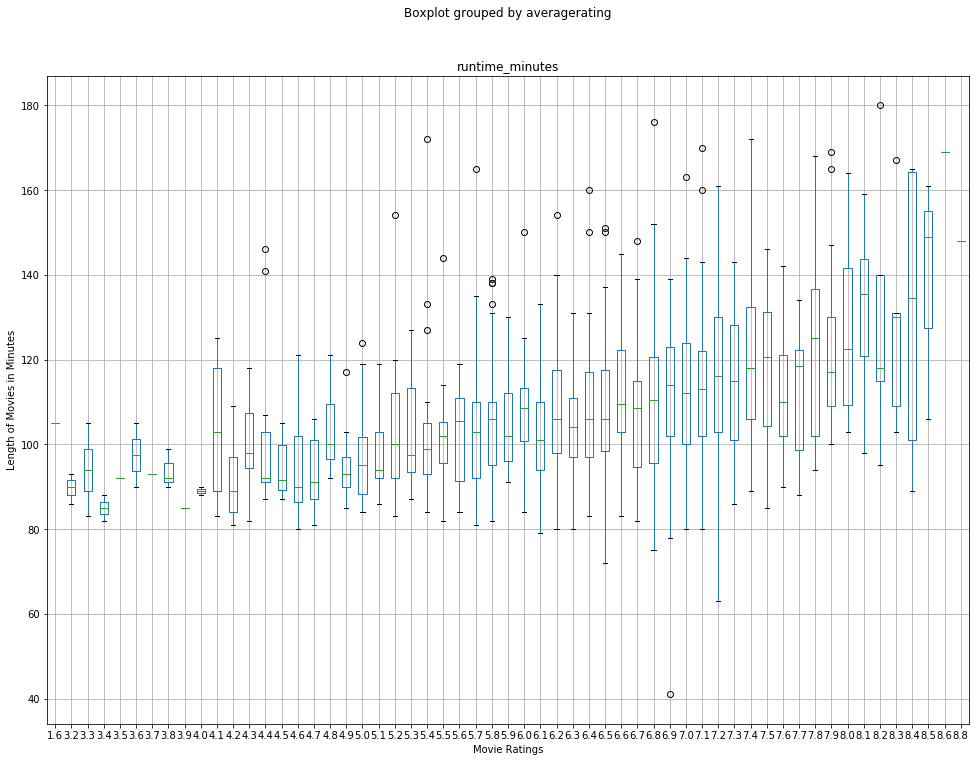

In [9]:
fig5 = df.boxplot(column='runtime_minutes', by='averagerating', figsize=(16,12))

plt.ylabel('Length of Movies in Minutes')
plt.xlabel('Movie Ratings')
plt.show()


In [10]:
# iqr_runtime = df[(df['runtime_minutes'] <= 119) & (df['runtime_minutes'] >= 96)]
# outer_runtime = df[(df['runtime_minutes'] > 119) | (df['runtime_minutes'] < 96)]
# fig6 = plt.figure(figsize=(16, 12))
# plt.plot()
# sns.distplot(iqr_runtime['averagerating'], color = 'skyblue', label = 'rating by movie length', bins = 10)
# sns.distplot(outer_runtime['averagerating'], color = 'red', label = 'rating by movie length', bins = 10)
# plt.xlabel("rating")
# plt.show()

# fig6.savefig("ratings by movie length.png")
# plt.clf()

# fig7 = plt.figure(figsize=(16, 12))
# plt.plot()
# sns.distplot(iqr_runtime['domestic_profit'], color = 'skyblue', bins = 10)
# sns.distplot(outer_runtime['domestic_profit'], color = 'red', bins = 10)
# plt.xlabel("Domestic Profit by Hundreds of Thousands of Dollars")
# plt.title("Domestic Profit by Duration of Movie")
# plt.show()

# fig7.savefig("profit by movie length.png")
# plt.clf()

# fig8 = plt.figure(figsize=(16, 12))
# plt.plot()
# sns.distplot(iqr_runtime['worldwide_profit'], color = 'orange', bins = 10)
# sns.distplot(outer_runtime['worldwide_profit'], color = 'green', bins = 10)
# plt.xlabel("Worldwide Profit by Hundreds of Thousands of Dollars")
# plt.title("Worldwide Profit by Duration of Movie")
# plt.show()

# fig8.savefig("worldwide profit by movie length.png")
# plt.clf()

# fig9 = plt.figure(figsize=(16, 12))
# plt.plot()
# sns.distplot(iqr_runtime['domestic_profit'], color = 'skyblue', bins = 10, axlabel = "domestic profit")
# sns.distplot(outer_runtime['domestic_profit'], color = 'red', bins = 10, axlabel = "domestic profit")
# sns.distplot(iqr_runtime['worldwide_profit'], color = 'orange', bins = 10, axlabel = "worldwide profit")
# sns.distplot(outer_runtime['worldwide_profit'], color = 'green', bins = 10, axlabel = "worldwide profit")

# plt.xlabel("Profit by Hundreds of Thousands of Dollars")
# plt.title("Profit by Duration of Movie")
# plt.show()

# fig9.savefig("all profit by movie length.png")
# plt.clf()

# fig10 = plt.figure(figsize=(16, 12))
# plt.plot()
# sns.distplot(iqr_runtime['domestic_profit'], color = 'skyblue', bins = 10, axlabel = "domestic profit")
# sns.distplot(iqr_runtime['worldwide_profit'], color = 'orange', bins = 10, axlabel = "worldwide profit")

# plt.xlabel("Profit by Hundreds of Thousands of Dollars")
# plt.title("Profit by Duration of Movie")
# plt.show()

# fig10.savefig("domestic and worldwide profit by movie length.png")
# plt.clf()

In [11]:
# fig11 = plt.figure(figsize=(16, 12))
# plt.plot()
# sns.distplot(['domestic_profit'], color = 'skyblue', bins = 10, axlabel = "domestic profit")
# sns.distplot(iqr_runtime['worldwide_profit'], color = 'orange', bins = 10, axlabel = "worldwide profit")

# plt.xlabel("Profit by Hundreds of Thousands of Dollars")
# plt.title("Profit by Duration of Movie")
# plt.show()

# fig10.savefig("domestic and worldwide profit by movie length.png")
# plt.clf()

# Release year 

In [12]:
# fig7 = plt.figure(figsize=(14, 8))
# plt.plot()

# movie_by_year = df.groupby(['year']).title.count()
# movie_by_year.plot(kind='bar', title='Movie count by year of release', color = 'orange')

# plt.xlabel('Release year')
# plt.ylabel('Movie count')
# plt.show()

# fig7.savefig("movie count by release year.png")
# plt.clf()

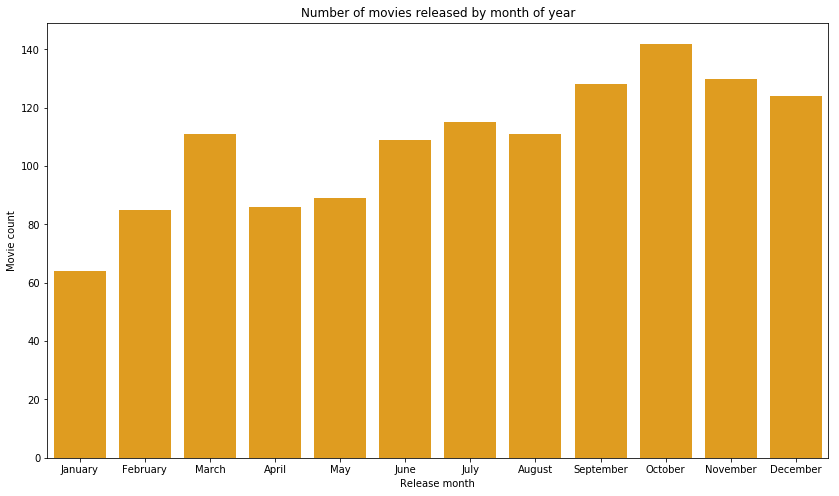

<Figure size 432x288 with 0 Axes>

In [13]:
fig21 = plt.figure(figsize=(14, 8))
plt.plot()

movie_by_month = df.groupby(['release_month','release_month_str']).title.count().reset_index()
sns.barplot('release_month_str','title', data= movie_by_month, color = 'orange')

plt.title('Number of movies released by month of year')
plt.xlabel('Release month')
plt.ylabel('Movie count')
plt.show()

fig21.savefig("movie count by release month.png")
plt.clf()

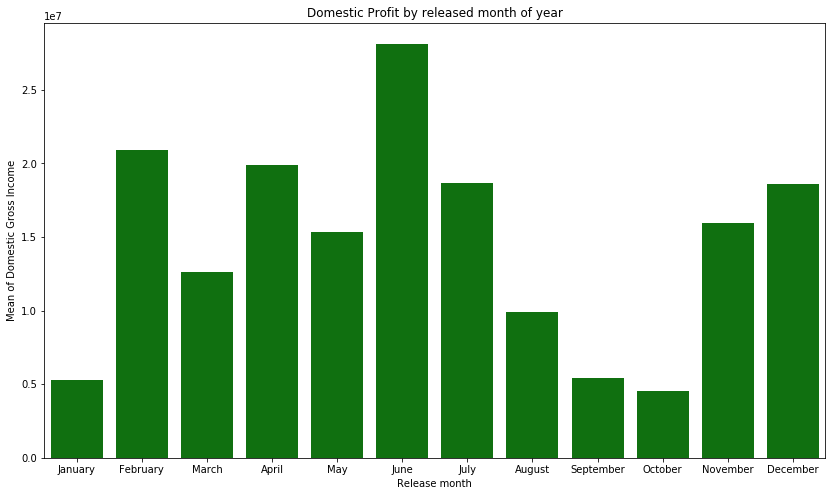

<Figure size 432x288 with 0 Axes>

In [14]:
fig22 = plt.figure(figsize=(14, 8))
plt.plot()

domestic_profit_by_month = df.groupby(['release_month','release_month_str']).domestic_profit.mean().reset_index()
sns.barplot('release_month_str','domestic_profit', data= domestic_profit_by_month, color = 'green')

plt.title('Domestic Profit by released month of year')
plt.xlabel('Release month')
plt.ylabel('Mean of Domestic Gross Income')
plt.show()

fig22.savefig("domestic profit by release month.png")
plt.clf()

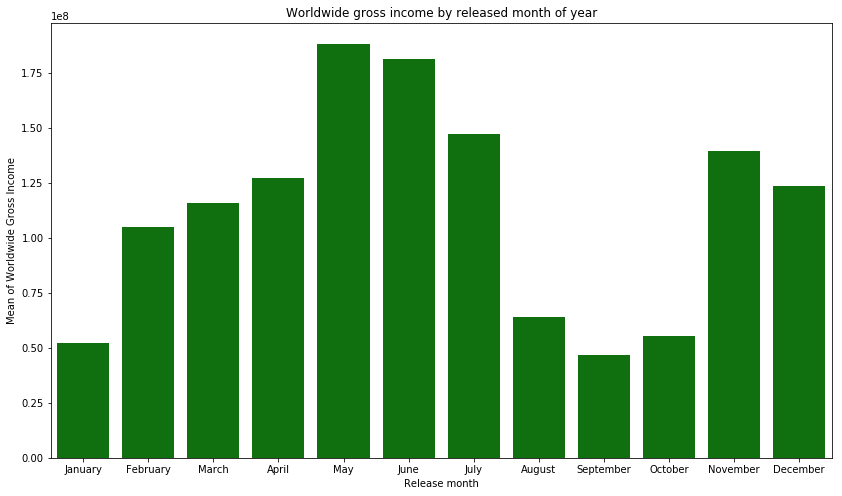

<Figure size 432x288 with 0 Axes>

In [15]:
fig24 = plt.figure(figsize=(14, 8))
plt.plot()

worldwide_profit_by_month = df.groupby(['release_month','release_month_str']).worldwide_profit.mean().reset_index()
sns.barplot('release_month_str','worldwide_profit', data= worldwide_profit_by_month, color = 'green')

plt.title('Worldwide gross income by released month of year')
plt.xlabel('Release month')
plt.ylabel('Mean of Worldwide Gross Income')
plt.show()

fig24.savefig("worldwide profit by release month.png")
plt.clf()

In [16]:
# domesticgross_by_month = df.groupby(['month']).domestic_gross.count()
# worldwidegross_by_month = df.groupby(['month']).worldwide_gross.count()

In [17]:
# df=pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101), 'z': (np.random.randn(100)*15+range(1,101))*2 })
 
# # fist line:
# plt.subplot(211)
# plt.plot( 'x', 'y', data=df, marker='o', alpha=0.4)
# plt.title("A subplot with 2 lines")
 
# # second line
# plt.subplot(212)
# plt.plot( 'x','z', data=df, linestyle='none', marker='o', color="orange", alpha=0.3)
# plt.show()


In [18]:
#  One of the reasons
# could be that because of tougher competition between
# releases during the holiday period, studios could actually be
# strategically positioning their releases so as not to compete
# with other major releases during the same time. Another
# explanation could be that during holidays children frequent
# the films more, therefore to smooth the seasonality and
# peaks during the holiday periods studios place other films
# outside the holiday period. 

# Genres

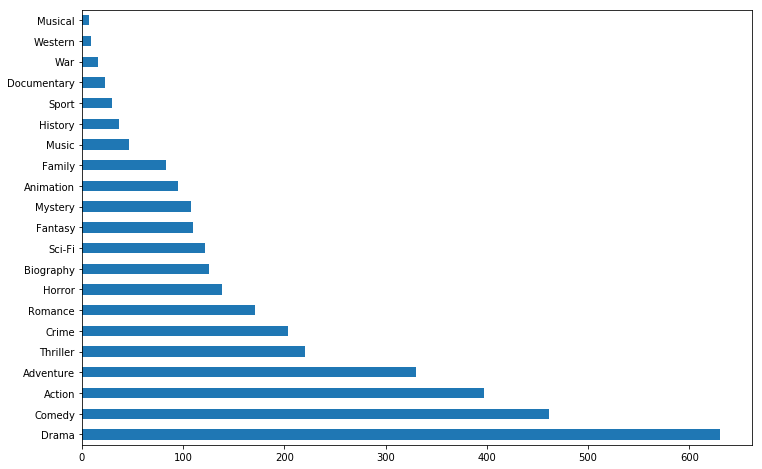

In [19]:
Glist = []
for x in df.genres.str.split(','):
    Glist.extend(x)
    
pd.value_counts(Glist).plot(kind = 'barh', figsize = (12, 8))

In [20]:
df_genres = df

In [21]:
df_genres = df_genres.join(df_genres.pop('genres').str.get_dummies(','))

In [22]:
df_genres.head()

,title,runtime_minutes,year,release_year_month,release_date,averagerating,numvotes,production_budget,domestic_gross,domestic_profit,worldwide_gross,worldwide_profit,release_month,release_month_str,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
1,Pirates of the Caribbean: On Stranger Tides,136.0,2011,2011-05,2011-05-20,6.6,447624.0,410600000.0,241063875.0,-169536125.0,1.045664e+09,6.350639e+08,5,May,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Dark Phoenix,113.0,2019,2019-06,2019-06-07,6.0,24451.0,350000000.0,42762350.0,-307237650.0,1.497624e+08,-2.002376e+08,6,June,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Avengers: Age of Ultron,141.0,2015,2015-05,2015-05-01,7.3,665594.0,330600000.0,459005868.0,128405868.0,1.403014e+09,1.072414e+09,5,May,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,Avengers: Infinity War,149.0,2018,2018-04,2018-04-27,8.5,670926.0,300000000.0,678815482.0,378815482.0,2.048134e+09,1.748134e+09,4,April,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,Justice League,120.0,2017,2017-11,2017-11-17,6.5,329135.0,300000000.0,229024295.0,-70975705.0,6.559452e+08,3.559452e+08,11,November,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Rating by different genres

In [23]:
rating_by_genres = {'Action': df_genres.loc[df_genres['Action'] == 1, 'averagerating'].mean(),\
                    'Adventure': df_genres.loc[df_genres['Adventure'] == 1, 'averagerating'].mean(),\
                    'Animation': df_genres.loc[df_genres['Animation'] == 1, 'averagerating'].mean(),\
                    'Biography': df_genres.loc[df_genres['Biography'] == 1, 'averagerating'].mean(),\
                    'Comedy': df_genres.loc[df_genres['Comedy'] == 1, 'averagerating'].mean(),\
                    'Crime': df_genres.loc[df_genres['Crime'] == 1, 'averagerating'].mean(),\
                    'Documentary': df_genres.loc[df_genres['Documentary'] == 1, 'averagerating'].mean(),\
                    'Drama': df_genres.loc[df_genres['Drama'] == 1, 'averagerating'].mean(),\
                    'Family': df_genres.loc[df_genres['Family'] == 1, 'averagerating'].mean(),\
                    'Fantasy': df_genres.loc[df_genres['Fantasy'] == 1, 'averagerating'].mean(),\
                    'History': df_genres.loc[df_genres['History'] == 1, 'averagerating'].mean(),\
                    'Horror': df_genres.loc[df_genres['Horror'] == 1, 'averagerating'].mean(),\
                    'Music': df_genres.loc[df_genres['Music'] == 1, 'averagerating'].mean(),\
                    'Musical': df_genres.loc[df_genres['Musical'] == 1, 'averagerating'].mean(),\
                    'Mystery': df_genres.loc[df_genres['Mystery'] == 1, 'averagerating'].mean(),\
                    'Romance': df_genres.loc[df_genres['Romance'] == 1, 'averagerating'].mean(),\
                    'Sci-Fi': df_genres.loc[df_genres['Sci-Fi'] == 1, 'averagerating'].mean(),\
                    'Sport': df_genres.loc[df_genres['Sport'] == 1, 'averagerating'].mean(),\
                    'Thriller': df_genres.loc[df_genres['Thriller'] == 1, 'averagerating'].mean(),\
                    'War': df_genres.loc[df_genres['War'] == 1, 'averagerating'].mean(),\
                    'Western': df_genres.loc[df_genres['Western'] == 1, 'averagerating'].mean()}

In [24]:
sorted_rating_by_genres = sorted(rating_by_genres.items(), key = lambda kv:(kv[1], kv[0]))

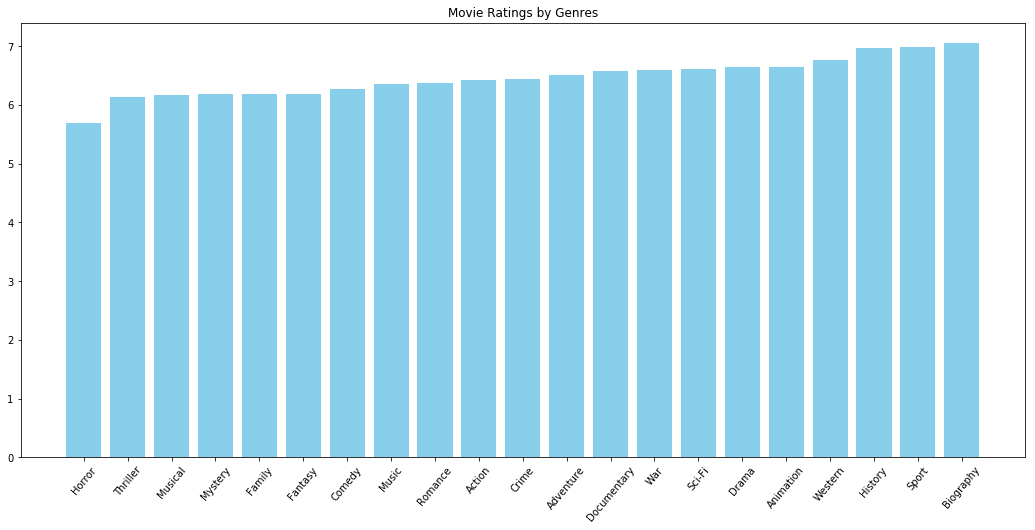

In [25]:
fig9 = plt.figure(figsize=(18, 8))
plt.plot()

plt.bar(range(len(sorted_rating_by_genres)), [val[1] for val in sorted_rating_by_genres], align='center', color = 'skyblue')
plt.xticks(range(len(sorted_rating_by_genres)), [val[0] for val in sorted_rating_by_genres])
plt.xticks(rotation=50)
plt.title("Movie Ratings by Genres")
plt.show()

fig9.savefig('rating by genres.png')

## Domestic Profit by different genres

In [26]:
domestic_by_genres = {'Action': df_genres.loc[df_genres['Action'] == 1, 'domestic_profit'].mean(),\
                    'Adventure': df_genres.loc[df_genres['Adventure'] == 1, 'domestic_profit'].mean(),\
                    'Animation': df_genres.loc[df_genres['Animation'] == 1, 'domestic_profit'].mean(),\
                    'Biography': df_genres.loc[df_genres['Biography'] == 1, 'domestic_profit'].mean(),\
                    'Comedy': df_genres.loc[df_genres['Comedy'] == 1, 'domestic_profit'].mean(),\
                    'Crime': df_genres.loc[df_genres['Crime'] == 1, 'domestic_profit'].mean(),\
                    'Documentary': df_genres.loc[df_genres['Documentary'] == 1, 'domestic_profit'].mean(),\
                    'Drama': df_genres.loc[df_genres['Drama'] == 1, 'domestic_profit'].mean(),\
                    'Family': df_genres.loc[df_genres['Family'] == 1, 'domestic_profit'].mean(),\
                    'Fantasy': df_genres.loc[df_genres['Fantasy'] == 1, 'domestic_profit'].mean(),\
                    'History': df_genres.loc[df_genres['History'] == 1, 'domestic_profit'].mean(),\
                    'Horror': df_genres.loc[df_genres['Horror'] == 1, 'domestic_profit'].mean(),\
                    'Music': df_genres.loc[df_genres['Music'] == 1, 'domestic_profit'].mean(),\
                    'Musical': df_genres.loc[df_genres['Musical'] == 1, 'domestic_profit'].mean(),\
                    'Mystery': df_genres.loc[df_genres['Mystery'] == 1, 'domestic_profit'].mean(),\
                    'Romance': df_genres.loc[df_genres['Romance'] == 1, 'domestic_profit'].mean(),\
                    'Sci-Fi': df_genres.loc[df_genres['Sci-Fi'] == 1, 'domestic_profit'].mean(),\
                    'Sport': df_genres.loc[df_genres['Sport'] == 1, 'domestic_profit'].mean(),\
                    'Thriller': df_genres.loc[df_genres['Thriller'] == 1, 'domestic_profit'].mean(),\
                    'War': df_genres.loc[df_genres['War'] == 1, 'domestic_profit'].mean(),\
                    'Western': df_genres.loc[df_genres['Western'] == 1, 'domestic_profit'].mean()}

In [27]:
sorted_domestic_by_genres = sorted(domestic_by_genres.items(), key = lambda kv:(kv[1], kv[0]))

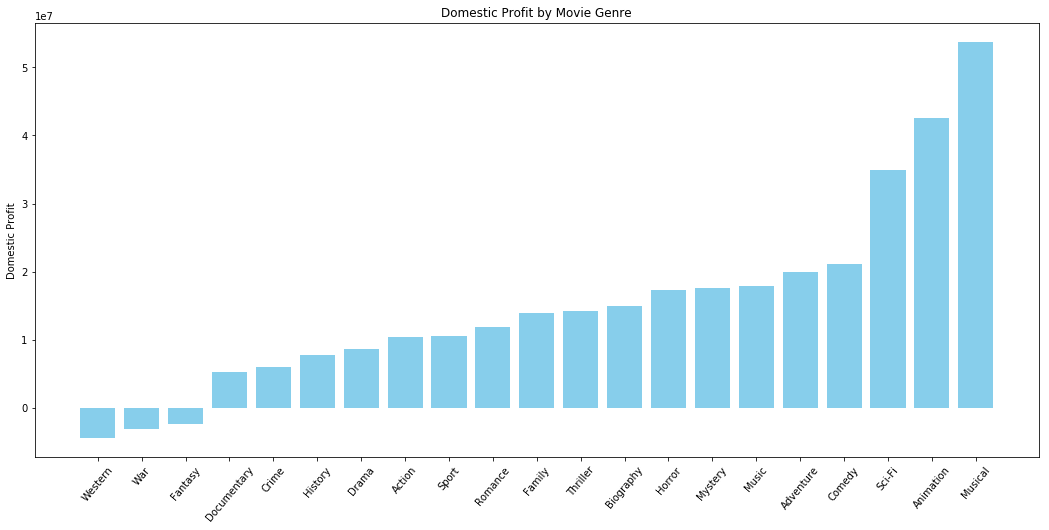

In [28]:
fig10 = plt.figure(figsize=(18, 8))
plt.plot()

plt.bar(range(len(sorted_domestic_by_genres)),\
        [val[1] for val in sorted_domestic_by_genres],\
        align='center', color = 'skyblue')
plt.xticks(range(len(sorted_domestic_by_genres)), [val[0] for val in sorted_domestic_by_genres])
plt.xticks(rotation=50)
plt.title("Domestic Profit by Movie Genre")
plt.ylabel("Domestic Profit")
plt.show()

fig10.savefig('domestic profit by genres.png')

## International Profit by Genres

In [29]:
worldwide_by_genres = {'Action': df_genres.loc[df_genres['Action'] == 1, 'worldwide_profit'].mean(),\
                    'Adventure': df_genres.loc[df_genres['Adventure'] == 1, 'worldwide_profit'].mean(),\
                    'Animation': df_genres.loc[df_genres['Animation'] == 1, 'worldwide_profit'].mean(),\
                    'Biography': df_genres.loc[df_genres['Biography'] == 1, 'worldwide_profit'].mean(),\
                    'Comedy': df_genres.loc[df_genres['Comedy'] == 1, 'worldwide_profit'].mean(),\
                    'Crime': df_genres.loc[df_genres['Crime'] == 1, 'worldwide_profit'].mean(),\
                    'Documentary': df_genres.loc[df_genres['Documentary'] == 1, 'worldwide_profit'].mean(),\
                    'Drama': df_genres.loc[df_genres['Drama'] == 1, 'worldwide_profit'].mean(),\
                    'Family': df_genres.loc[df_genres['Family'] == 1, 'worldwide_profit'].mean(),\
                    'Fantasy': df_genres.loc[df_genres['Fantasy'] == 1, 'worldwide_profit'].mean(),\
                    'History': df_genres.loc[df_genres['History'] == 1, 'worldwide_profit'].mean(),\
                    'Horror': df_genres.loc[df_genres['Horror'] == 1, 'worldwide_profit'].mean(),\
                    'Music': df_genres.loc[df_genres['Music'] == 1, 'worldwide_profit'].mean(),\
                    'Musical': df_genres.loc[df_genres['Musical'] == 1, 'worldwide_profit'].mean(),\
                    'Mystery': df_genres.loc[df_genres['Mystery'] == 1, 'worldwide_profit'].mean(),\
                    'Romance': df_genres.loc[df_genres['Romance'] == 1, 'worldwide_profit'].mean(),\
                    'Sci-Fi': df_genres.loc[df_genres['Sci-Fi'] == 1, 'worldwide_profit'].mean(),\
                    'Sport': df_genres.loc[df_genres['Sport'] == 1, 'worldwide_profit'].mean(),\
                    'Thriller': df_genres.loc[df_genres['Thriller'] == 1, 'worldwide_profit'].mean(),\
                    'War': df_genres.loc[df_genres['War'] == 1, 'worldwide_profit'].mean(),\
                    'Western': df_genres.loc[df_genres['Western'] == 1, 'worldwide_profit'].mean()}

In [30]:
sorted_worldwide_by_genres = sorted(worldwide_by_genres.items(), key = lambda kv:(kv[1], kv[0]))

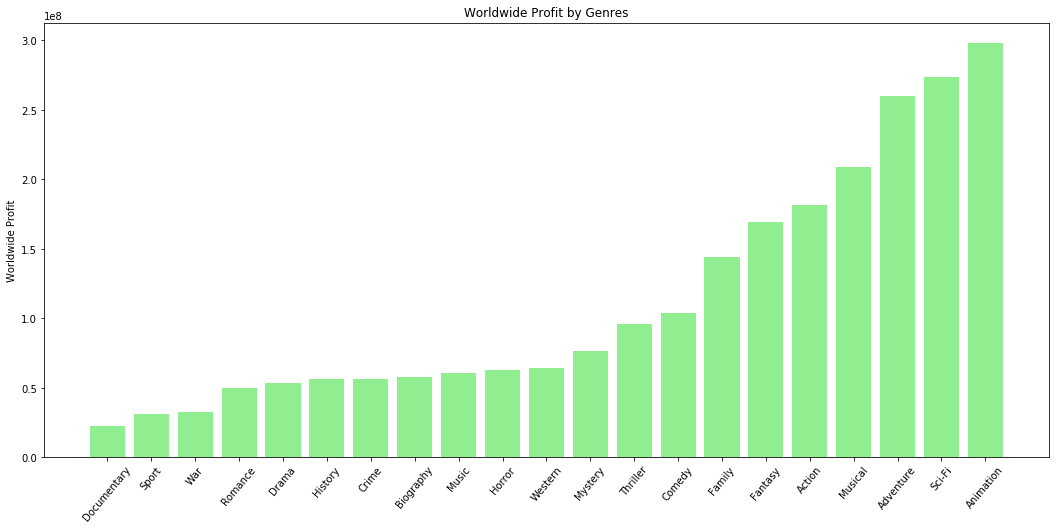

In [31]:
fig11 = plt.figure(figsize=(18, 8))
plt.plot()

plt.bar(range(len(sorted_worldwide_by_genres)), [val[1] for val in sorted_worldwide_by_genres], align='center', color = 'lightgreen')
plt.xticks(range(len(sorted_worldwide_by_genres)), [val[0] for val in sorted_worldwide_by_genres])
plt.xticks(rotation=50)
plt.title("Worldwide Profit by Genres")
plt.ylabel("Worldwide Profit")
plt.show()

fig11.savefig('worldwide profit by genres.png')

## Genere by movie durations

In [32]:
duration_by_genres = {'Action': df_genres.loc[df_genres['Action'] == 1, 'runtime_minutes'].mean(),\
                    'Adventure': df_genres.loc[df_genres['Adventure'] == 1, 'runtime_minutes'].mean(),\
                    'Animation': df_genres.loc[df_genres['Animation'] == 1, 'runtime_minutes'].mean(),\
                    'Biography': df_genres.loc[df_genres['Biography'] == 1, 'runtime_minutes'].mean(),\
                    'Comedy': df_genres.loc[df_genres['Comedy'] == 1, 'runtime_minutes'].mean(),\
                    'Crime': df_genres.loc[df_genres['Crime'] == 1, 'runtime_minutes'].mean(),\
                    'Documentary': df_genres.loc[df_genres['Documentary'] == 1, 'runtime_minutes'].mean(),\
                    'Drama': df_genres.loc[df_genres['Drama'] == 1, 'runtime_minutes'].mean(),\
                    'Family': df_genres.loc[df_genres['Family'] == 1, 'runtime_minutes'].mean(),\
                    'Fantasy': df_genres.loc[df_genres['Fantasy'] == 1, 'runtime_minutes'].mean(),\
                    'History': df_genres.loc[df_genres['History'] == 1, 'runtime_minutes'].mean(),\
                    'Horror': df_genres.loc[df_genres['Horror'] == 1, 'runtime_minutes'].mean(),\
                    'Music': df_genres.loc[df_genres['Music'] == 1, 'runtime_minutes'].mean(),\
                    'Musical': df_genres.loc[df_genres['Musical'] == 1, 'runtime_minutes'].mean(),\
                    'Mystery': df_genres.loc[df_genres['Mystery'] == 1, 'runtime_minutes'].mean(),\
                    'Romance': df_genres.loc[df_genres['Romance'] == 1, 'runtime_minutes'].mean(),\
                    'Sci-Fi': df_genres.loc[df_genres['Sci-Fi'] == 1, 'runtime_minutes'].mean(),\
                    'Sport': df_genres.loc[df_genres['Sport'] == 1, 'runtime_minutes'].mean(),\
                    'Thriller': df_genres.loc[df_genres['Thriller'] == 1, 'runtime_minutes'].mean(),\
                    'War': df_genres.loc[df_genres['War'] == 1, 'runtime_minutes'].mean(),\
                    'Western': df_genres.loc[df_genres['Western'] == 1, 'runtime_minutes'].mean()}

In [33]:
sorted_duration_by_genres = sorted(duration_by_genres.items(), key = lambda kv:(kv[1], kv[0]))

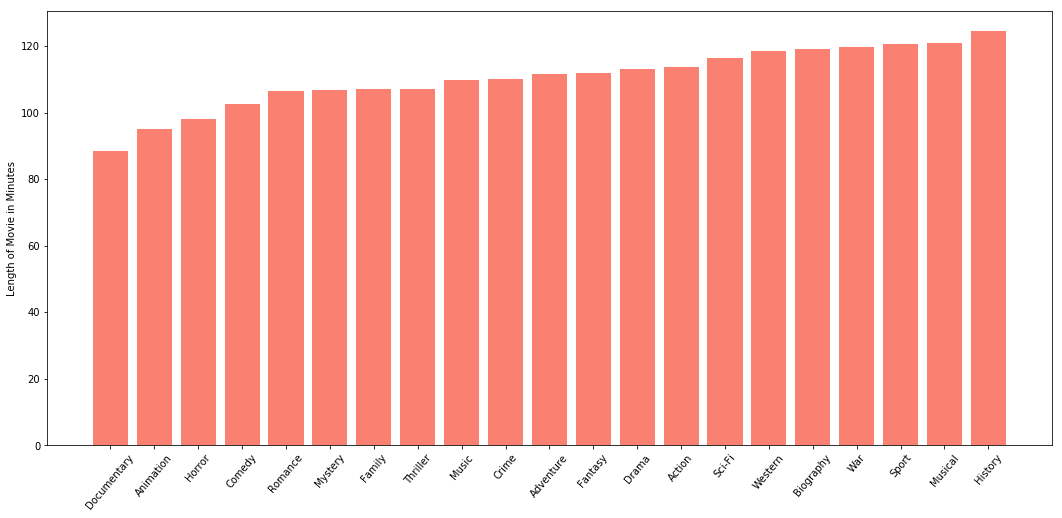

In [34]:
fig12 = plt.figure(figsize=(18, 8))
plt.plot()

plt.bar(range(len(sorted_duration_by_genres)), [val[1] for val in sorted_duration_by_genres], align='center', color = 'salmon')
plt.xticks(range(len(sorted_duration_by_genres)), [val[0] for val in sorted_duration_by_genres])
plt.xticks(rotation=50)
plt.ylabel("Length of Movie in Minutes")
plt.show()

fig12.savefig('movie duration gross by genres.png')

In [35]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 1 to 5806
Data columns (total 35 columns):
title                 1294 non-null object
runtime_minutes       1294 non-null float64
year                  1294 non-null int64
release_year_month    1294 non-null period[M]
release_date          1294 non-null datetime64[ns]
averagerating         1294 non-null float64
numvotes              1294 non-null float64
production_budget     1294 non-null float64
domestic_gross        1294 non-null float64
domestic_profit       1294 non-null float64
worldwide_gross       1294 non-null float64
worldwide_profit      1294 non-null float64
release_month         1294 non-null int64
release_month_str     1294 non-null object
Action                1294 non-null int64
Adventure             1294 non-null int64
Animation             1294 non-null int64
Biography             1294 non-null int64
Comedy                1294 non-null int64
Crime                 1294 non-null int64
Documentary           

In [36]:
df_genres.loc[(df_genres['Action'] == 1), 'runtime_minutes'].mean()

113.74055415617129

In [37]:
df_genres.loc[(df_genres['History'] == 1), 'runtime_minutes'].mean()

124.45945945945945

In [38]:
df_genres.loc[(df_genres['Animation'] == 1), 'runtime_minutes'].mean()

95.12631578947368

In [39]:
df_genres.loc[(df_genres['Sci-Fi'] == 1), 'runtime_minutes'].mean()

116.31147540983606

In [40]:
df_genres.loc[(df_genres['Adventure'] == 1), 'runtime_minutes'].mean()

111.52424242424243